In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Load dataset
df = pd.read_csv('/content/wearable_tech_sleep_quality_1.csv')


In [8]:
# View the first few rows of the dataset
print(df.head())

# Summary statistics
print(df.describe())


   Heart_Rate_Variability  Body_Temperature  Movement_During_Sleep  \
0               79.934283         37.199678               1.324822   
1               67.234714         36.962317               1.855481   
2               82.953771         36.529815               1.207580   
3              100.460597         36.176532               1.692038   
4               65.316933         36.849112               0.106385   

   Sleep_Duration_Hours  Sleep_Quality_Score  Caffeine_Intake_mg  \
0              4.638289                  1.0          107.624032   
1              6.209422                  1.0          104.658589   
2              6.879592                 10.0            0.000000   
3             10.331531                  1.0          116.990981   
4              8.334830                  1.0          223.282908   

   Stress_Level  Bedtime_Consistency  Light_Exposure_hours  
0      2.771837             0.657037              7.933949  
1      3.738138             0.144464            

In [9]:
# Check for missing values
print(df.isnull().sum())

# Fill missing values (e.g., with mean)
df.fillna(df.mean(), inplace=True)


Heart_Rate_Variability    0
Body_Temperature          0
Movement_During_Sleep     0
Sleep_Duration_Hours      0
Sleep_Quality_Score       0
Caffeine_Intake_mg        0
Stress_Level              0
Bedtime_Consistency       0
Light_Exposure_hours      0
dtype: int64


In [10]:
# Features and target variable
X = df.drop('Sleep_Quality_Score', axis=1)
y = df['Sleep_Quality_Score']


In [11]:
from sklearn.model_selection import train_test_split

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor


In [13]:
# Initialize the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [14]:
# Predict using the test set
y_pred = model.predict(X_test)


In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate MAE and MSE
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")


Mean Absolute Error (MAE): 0.09671180995569799
Mean Squared Error (MSE): 0.05254836851106958


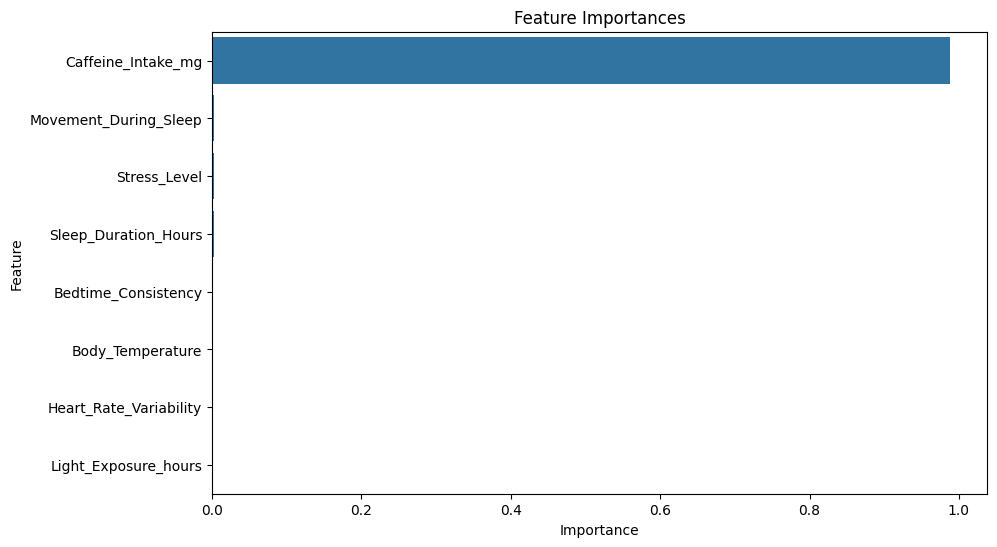

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Feature importance
importances = model.feature_importances_
features = X.columns

# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances')
plt.show()


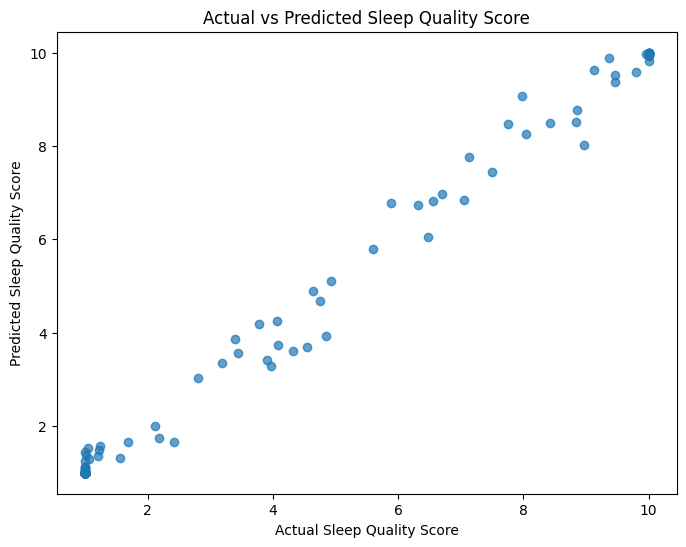

In [17]:
# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Actual Sleep Quality Score')
plt.ylabel('Predicted Sleep Quality Score')
plt.title('Actual vs Predicted Sleep Quality Score')
plt.show()


In [18]:
pip install pandas numpy scikit-learn matplotlib seaborn


In [19]:
def predict_sleep_quality(new_data):
    """
    Predict the Sleep Quality Score based on new data.
    :param new_data: A dictionary containing the input features.
    :return: The predicted Sleep Quality Score.
    """
    new_df = pd.DataFrame([new_data])
    prediction = model.predict(new_df)
    return prediction[0]

# Example usage
new_data = {
    'Heart_Rate_Variability': 75.0,
    'Body_Temperature': 36.8,
    'Movement_During_Sleep': 1.5,
    'Sleep_Duration_Hours': 7.0,
    'Caffeine_Intake_mg': 50.0,
    'Stress_Level': 3.0,
    'Bedtime_Consistency': 0.6,
    'Light_Exposure_hours': 8.0
}

predicted_score = predict_sleep_quality(new_data)
print(f"Predicted Sleep Quality Score: {predicted_score}")


Predicted Sleep Quality Score: 5.847891296633468


In [22]:
#Advanced Analysis
df['Caffeine_Stress_Interaction'] = df['Caffeine_Intake_mg'] * df['Stress_Level']


In [23]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_poly = poly.fit_transform(X)


In [24]:
from sklearn.feature_selection import RFE

selector = RFE(model, n_features_to_select=5)
selector = selector.fit(X_train, y_train)
selected_features = X.columns[selector.support_]


In [25]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30]
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [10, 20, 30],
                         'n_estimators': [50, 100, 200]})

In [26]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X)
df['Cluster'] = clusters


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


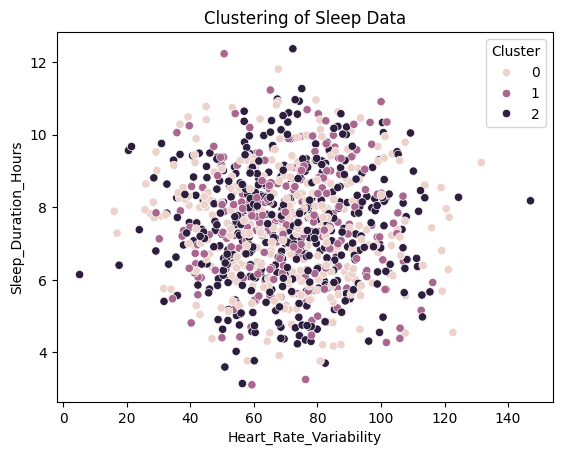

In [27]:
sns.scatterplot(data=df, x='Heart_Rate_Variability', y='Sleep_Duration_Hours', hue='Cluster')
plt.title('Clustering of Sleep Data')
plt.show()


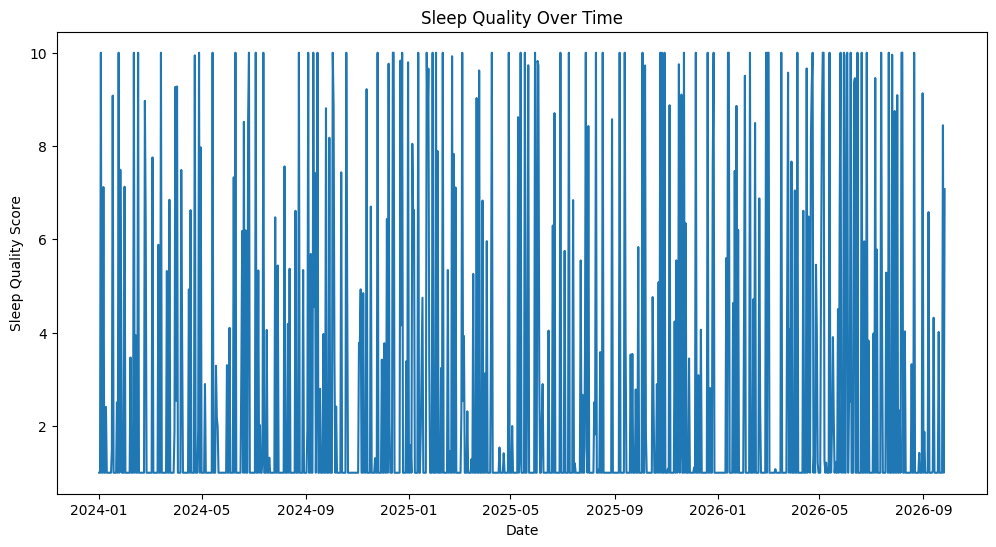

In [28]:
df['Date'] = pd.date_range(start='2024-01-01', periods=len(df), freq='D')
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Sleep_Quality_Score'])
plt.title('Sleep Quality Over Time')
plt.xlabel('Date')
plt.ylabel('Sleep Quality Score')
plt.show()


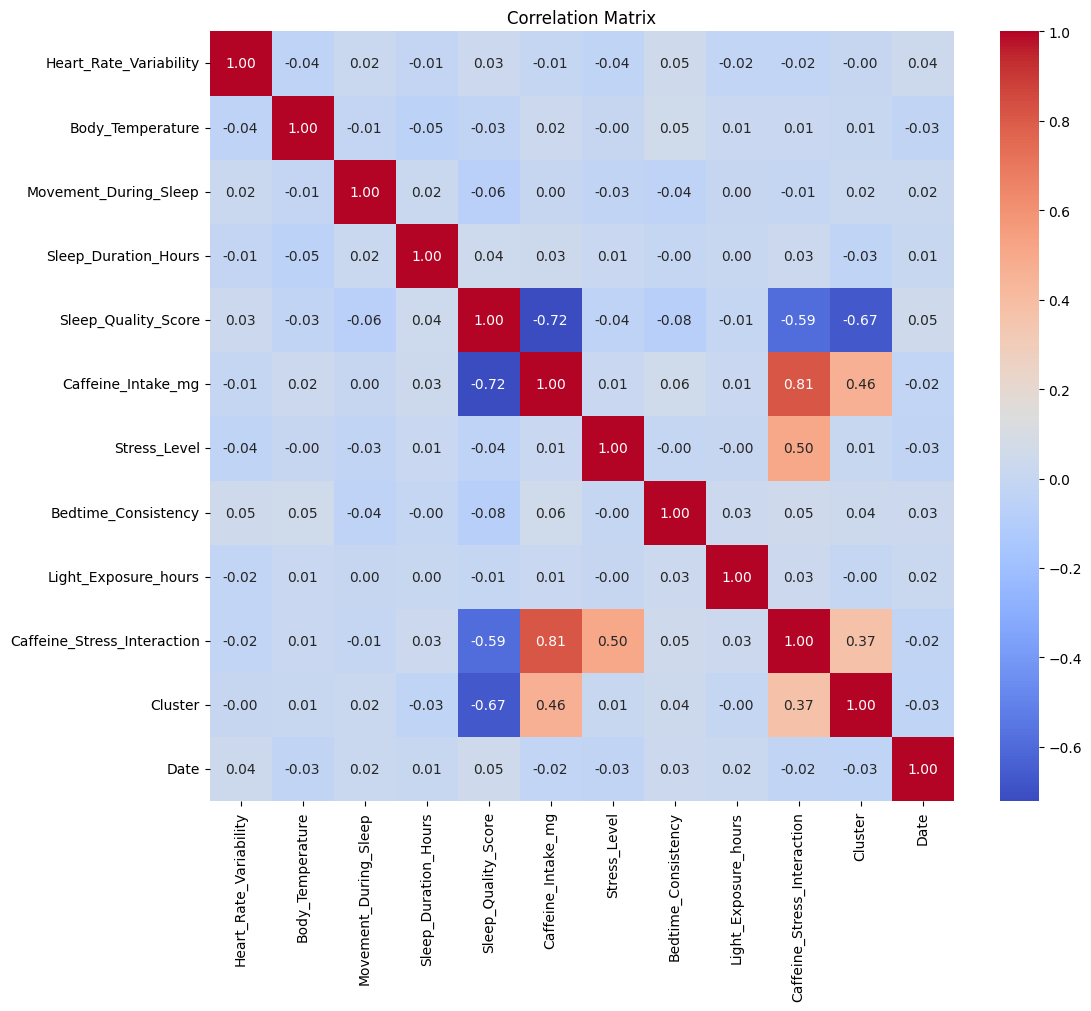

In [29]:
plt.figure(figsize=(12, 10))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()
